# Principle Component Analysis

## 1. Einleitung
Dieses Jupyter Notebook stellt eine Ergänzung der wissenschaftlichen Arbeit über die Principle Component Analysis dar. Der prinzipielle Aufbau des Notebooks ist daher gleich mit dem der Arbeit.

In [3]:
# Imports and Configuration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import zipfile
import cv2
from sklearn.decomposition import PCA
import os

workingDirPath = os.getcwd()


#print(dataPath1)

## 2. Mathematische Grundlagen 
Nachfolgend wird der Unterschied zwischen einer geringen und einer hohen Varainz veranschaulicht und dessen Berechnung eingeführt.

### 2.1 Standardabweichung und Varianz

D:\Codes\AML\DHBW_AML


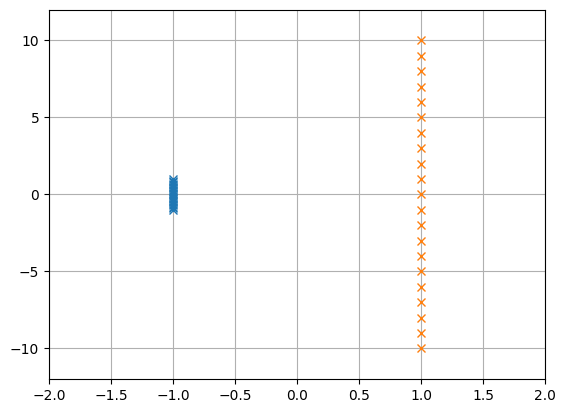

In [9]:
#Erstellen von Daten
X1 = np.arange(-1, 1.1, 0.1)
X2 = np.arange(-10, 11, 1)
Y1 = np.repeat(-1,len(X1))
Y2 = np.repeat(1,len(X2))

#Plotten von Daten
plt.plot(Y1, X1, 'x')
plt.plot(Y2, X2, 'x')

#Formatierung des Plots
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-12, 12)

#Speichern des Plots
plt.savefig('Figures/Std_Var.pdf')
plt.show()

### 2.2 Eigenwerte und Eigenvektoren


In [ ]:
#Erstellen einer Matix


#Berechnung der Eigenwerte und Eigenvektoren


#Zeigen, dass Eigenvektoren rechtwicklig zueinader sind


## 3. Durchführung einer PCA

### 3.1 Standardisierung

Zuerst werden einige zufällige Daten generiert. Es werden 100 Beispiele mit je 3 Merkmalen generiert.
Daraufhin werden die Merkmale standardisiert indem der Mittelwert subtrahiert und durch die Standardabweichung geteilt wird.

In [30]:
X = np.random.rand(20, 5)
print(X)
X = (X - X.mean()) / X.std()

[[0.64276512 0.60460383 0.53639751 0.67677015 0.61011894]
 [0.27998286 0.4557206  0.05417892 0.16903582 0.54386238]
 [0.13631431 0.03788893 0.92874803 0.65139984 0.79074095]
 [0.31404018 0.60417    0.75256408 0.23595064 0.51771996]
 [0.03620414 0.42276586 0.53197735 0.04311935 0.35344559]
 [0.59861489 0.86110628 0.41575052 0.44469861 0.99402828]
 [0.87606954 0.19529595 0.4318788  0.31285449 0.95710852]
 [0.7644239  0.79649159 0.59639049 0.49492612 0.30620976]
 [0.90230301 0.20972841 0.5751998  0.31821428 0.86781585]
 [0.07648164 0.18626891 0.51432965 0.41530794 0.53152047]
 [0.63373978 0.41253221 0.62142047 0.58491535 0.8055774 ]
 [0.50515747 0.21477124 0.2836482  0.73952824 0.61354922]
 [0.71339867 0.66392086 0.93116478 0.6323118  0.06611036]
 [0.94691718 0.46312801 0.69727601 0.94906498 0.42750374]
 [0.38747643 0.64566781 0.81709475 0.23094773 0.89605909]
 [0.86872514 0.3321485  0.24052464 0.20531139 0.01309433]
 [0.83219422 0.13351796 0.83223496 0.70187586 0.92977482]
 [0.43245225 0

### 3.2 Berechnung der Kovarianzmatrix

In [ ]:
C = np.cov(X.T)

### 3.3 Berechnen der Eigenvektoren und Eigenwerte der Kovarianzmatrix 

Die Eigenwerte und Eigenvektoren werden berechnet und danach in absteigender Reihenfolge sortiert.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(C)
eigenvalues, eigenvectors = zip(*sorted(zip(eigenvalues, eigenvectors), key=lambda x: x[0], reverse=True))

### 3.4 Bilden eines Feature Vektors

Zur Durchführung der PCA muss die Anzahl der Komponenten angegeben werden die behalten werden sollen.

In [ ]:
n_components = 5
feature_vector_matrix = eigenvectors[:n_components]

### 3.5 Umformen der Daten

Die Matrix aus den Feature Vektoren wird dann umgeformt auf die Achsen der neuen Hauptkomponenten.

In [ ]:
X_pca_converted = X.dot(feature_vector_matrix)
print(X_pca_converted)

In [ ]:
pca_data = np.dot(X, eigenvectors)
print("Transformed data ", pca_data.shape)

### 5.1 Dimensionsreduktion

Im folgenden wird ein bekanntes Beispiel einer Gesichtserkennung mit der ORL Datenbank das je 10 Bilder von 40 verschiedenen Personen beinhaltet in der auch PCA Anwendung findet.

Showing sample faces


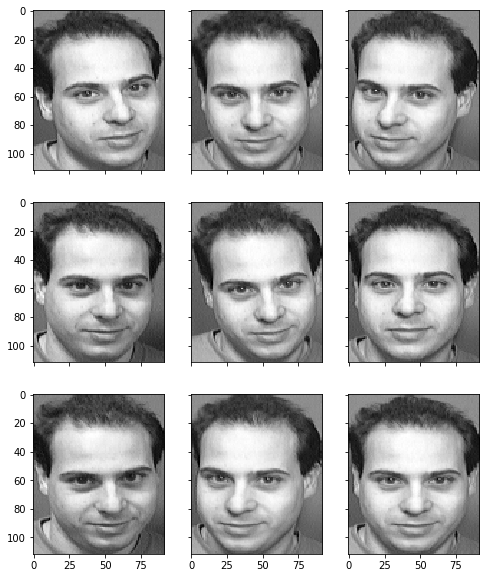

Number of classes: 40
Number of images: 400
Showing the eigenfaces


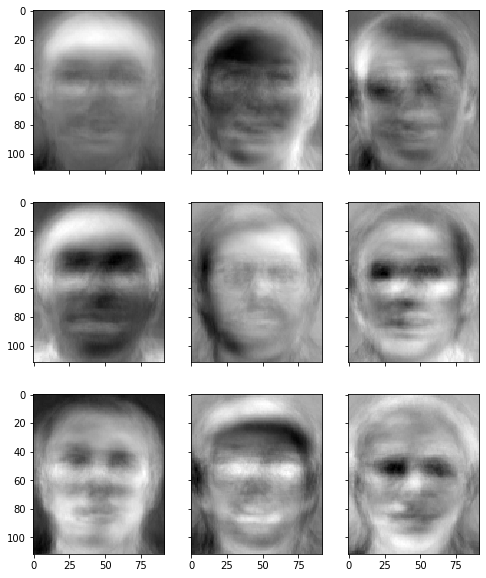

Shape of the weight matrix: (70, 389)
Best match s30 with Euclidean distance 1167.337242


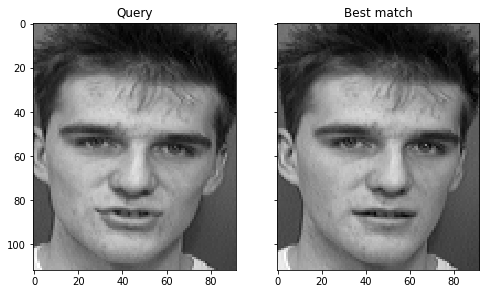

Best match s5 with Euclidean distance 2822.202904


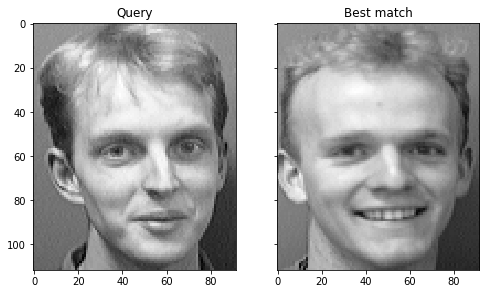

In [11]:
dataPath = os.path.join(workingDirPath,"Data","Dimensionsreduktion","archive1.zip")

# Einlesen aus dem zip Ordner
faces = {}
with zipfile.ZipFile(dataPath) as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

#Beipielhaftes Zeigen einiger Gesichter
fig, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(8,10))
faceimg = list(faces.values())[-9:] 
for i in range(9):
    axes[i%3][i//3].imshow(faceimg[i], cmap="gray")
print("Showing sample faces")
plt.show()

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Alle Klassen bis auf die letzte und ein einzelnes Bild werden werden genutzt.
# Diese beiden werden fürs Testen verwendet
matrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue 
    if key == "s30/10.pgm":
        continue 
    matrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

# Erstellen der Matrix und Anwendung von PCA
matrix = np.array(matrix)
pca = PCA().fit(matrix)
n_components = 70
eigenfaces = pca.components_[:n_components]

# Zeigen der ersten Eigenfaces
fig, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(8,10))
for i in range(9):
    axes[i%3][i//3].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

# Generieren der Gewichte der Matrix
weights = eigenfaces @ (matrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

# Testen an dem einzelnen Bilder der existierenden Klasse
query = faces["s30/10.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualisierung
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(matrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

# Testen am Bild aus der neuen Klasse
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualisierung
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(matrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

### 5.2 PCA zur Unterstützung beim Clustering

Beispiel einfügen

In [ ]:
#TBD


### 5.3 PCA zur Bildkompression

In diesem Beispiel wird gezeigt, wie mehere Bilder mithilfe der PCA komprimiert werden können. Dazu werden die Bilder aus Abschnitt 5.1 wiederverwendet. Unkomprimiert haben diese eine Größe von 4.121.600 Byte.
Zur Kompression der Bilder werden die 400 Bilder "übereinander" gelegt und ein Vektor für jeden Pixel über alle Bilder gebildet. Da die Bilder dieses Datensatzes 112 mal 92 Pixel besitzen, ergeben sich 10.304 Vektoren mit je 400 Elementen.

In [124]:
dataPath = os.path.join(workingDirPath,"Data","Bildkompression")
#Dimensionen der Daten
yPixel = 112
xPixel = 92
anzahlImg = 400

#Bilder aus Datei laden
i = 0
images = np.zeros((yPixel, xPixel, anzahlImg))
for (dirPath, dirNames, fileNames) in os.walk(dataPath):
    for filename in fileNames:
        imagePath = os.path.join(dirPath, filename)
        if  filename.endswith(".pgm"):
            #Bild gefunden --> Bild laden
            images[:,:,i] = img.imread(imagePath)
            i = i + 1

#Datenmatrix erzeugen --> Zielgröße 10304 x 400 --> 400 Dimmensionen
data = np.zeros((yPixel*xPixel, anzahlImg))
index = 0
for i in range(yPixel):
    for j in range(xPixel):
        for k in range(anzahlImg):
            data[index, k] = images[i,j,k]
        index = index + 1
data.shape

(10304, 400)

Im nächsten Schritt wird die PCA mit diesen Vekotren durchgeführt. Daher ergeben sich 400 Eigenwerte und Eigenvektoren. Der Beitrag der Hauptkomponeten ist anschließend in einer Grafik Visualisiert. Anhand dieser wird beschlossen auschließlich die Informationen der n wichtigsten Hauptkomponenten gespeichert werden.
Auf die Standadisierung wird hier verzichtet (auf False gestellt), da andernfalls durch die Skalierung der Vektoren der Kontras im wiederhergestellten Bild verschwinden klein ist. Zudem müssten alle Mittelwerte gespeichert werden, um das Orginalbild zu rekonstruieren. (Auswirkungen der Standardisieung können durch Umschalten auf True in der if-Bedingung getestet werden).

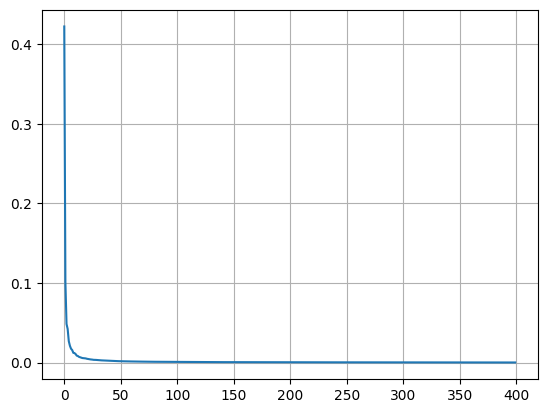

In [202]:
#Standardisierung
if False:
    sData = np.zeros((yPixel*xPixel, anzahlImg))
    for i in range(anzahlImg):
        temp = data[:,i]
        sData[:,i] = (temp-temp.mean()) / temp.std()
else:
    sData = data
    
#PCA Bilder
pca = PCA().fit(sData)

#Plotten des Prozentualen Beitrags zur Varianz
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.show()


In [198]:
#Auswhählen von n Hauptkomponenten
n = 250
print("Verbleibende Varianz: ", pca.explained_variance_ratio_[:n].sum())
featureVektor = pca.components_[:n]

#Transformation des Datensatzes --> Dieser würde gespeichert werden
transformedImages = np.matmul(featureVektor, sData.transpose())
print("Verbleibende Größe des Datensatzes: ", transformedImages.shape)
newSize = transformedImages.shape[0]* transformedImages.shape[1]
oldSize = data.shape[0]*data.shape[1]
print("Dies entspricht ", newSize, "Bytes, ", newSize/oldSize*100, "% des Orginals")


Verbleibende Varianz:  0.9802065714734112
Verbleibende Größe des Datensatzes:  (250, 10304)
Dies entspricht  2576000 Bytes,  62.5 % des Orginals


Nun sind die Orginalen Bilder in den neuen Raum zu transformieren. Dies wird exemplarisch für ein Bild gemacht. Da nicht alle Hauptkomponenten verwendet werden, geht bei diesem Schritt Information verlohren. Dies ist im Vergleich zwischen der Orginal-Bild und dem komprimierten Bild zu erkennen.

Dimension des wiederhergestellten Datensatzes: (10304, 400)


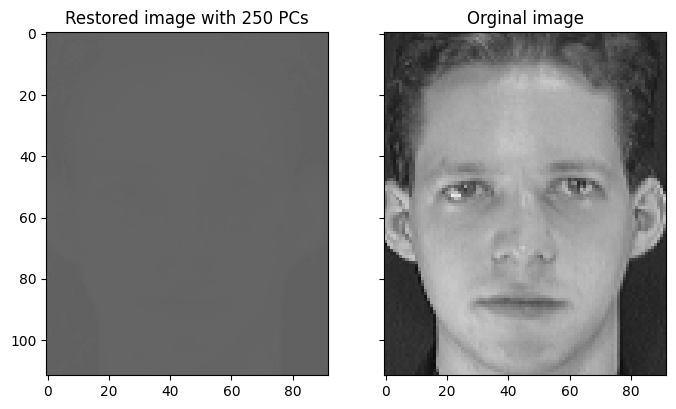

In [201]:
#Umformen eines Bilds & Vergleich der Bilder
restoredImages = np.matmul(featureVektor.transpose(), transformedImages).transpose()
print("Dimension des wiederhergestellten Datensatzes:", restoredImages.shape) #Vergleich zu oben: Dimensionalität gleich

#Darstellen eines Bildes aus Orginal Datensatz und wiederhergestellten Datensatz
imgIndex = 0

orginalImg = np.zeros((yPixel, xPixel))
restoredImg = np.zeros((yPixel, xPixel))

index = 0
for i in range(yPixel):
    for j in range(xPixel):
        orginalImg[i,j] = data[index, imgIndex]
        restoredImg[i,j] = restoredImages[index, imgIndex]
        index = index + 1

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(restoredImg, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Restored image with " + str(n) + " PCs")
axes[1].imshow(orginalImg, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Orginal image')
plt.savefig('Figures/Bildkompression.pdf')
plt.show()